🧹 Cache cleared. Re-downloading MNIST...
✅ MNIST downloaded successfully!
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model Evaluation Metrics:
--------------------------
Accuracy : 0.9995
Precision: 0.9991
Recall   : 1.0
F1-Score : 0.9996


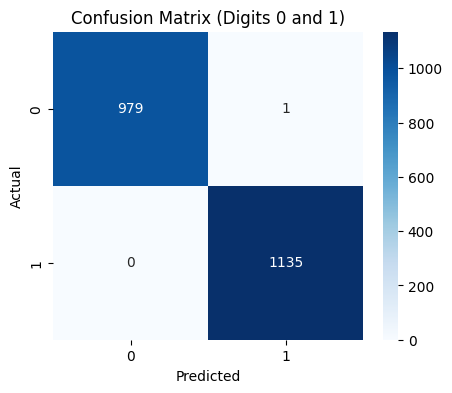

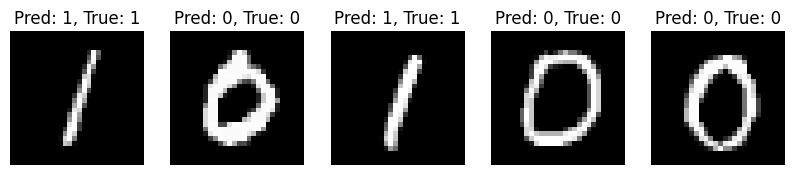

In [1]:
# -*- coding: utf-8 -*-
"""Untitled3.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1duMhsxlnpMsQPh3oB26_K7buyqb6H4M4
"""

from sklearn.datasets import fetch_openml
import shutil
from pathlib import Path

# Find and delete sklearn's openml cache
cache_dir = Path.home() / "scikit_learn_data" / "openml"
shutil.rmtree(cache_dir, ignore_errors=True)

print("🧹 Cache cleared. Re-downloading MNIST...")

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("✅ MNIST downloaded successfully!")

# ==============================
# Binary Classification on MNIST (0 vs 1) using Logistic Regression
# ==============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# ------------------------------
# Step 1: Load the MNIST dataset
# ------------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# ------------------------------
# Step 2: Preprocess the data
# ------------------------------
# Flatten 28x28 images into 784-length vectors and normalize
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# ------------------------------
# Step 3: Train the Logistic Regression model
# ------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# ------------------------------
# Step 4: Make predictions
# ------------------------------
y_pred = model.predict(x_test)

# ------------------------------
# Step 5: Evaluate the model
# ------------------------------
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("--------------------------")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1-Score :", round(f1, 4))

# ------------------------------
# Step 6: Confusion Matrix Visualization
# ------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Digits 0 and 1)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------------------
# Step 7: Visualize Sample Predictions
# ------------------------------
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()

# ------------------------------
# End of Program
# ------------------------------

